In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
credit_df = pd.read_csv('credit-1.csv')
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [6]:
credit_df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
clean_df = credit_df

In [8]:
for column in clean_df.columns:
    if clean_df[column].dtype == 'object':
        clean_df[column] = pd.Categorical(clean_df[column]).codes

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.6 KB


In [10]:
test_size = 0.3
random_seed = 1

X = clean_df.loc[:,clean_df.columns != 'default']
y = clean_df['default']

X.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0


In [11]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int8

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=random_seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 16)
(300, 16)
(700,)
(300,)


## General Decision Tree

In [13]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
print("Training Score ="+str(dtree.score(X_train,y_train)))
print("Testing Score ="+str(dtree.score(X_test,y_test)))

Training Score =1.0
Testing Score =0.6566666666666666


## Ensemble BaggingClassifier with Decision Tree

In [15]:
bag_Class = BaggingClassifier(n_estimators=50,max_samples=0.8,oob_score=True)
bag_Class.fit(X,y)
print("OOb Score=" + str(bag_Class.oob_score_))

OOb Score=0.74


In [23]:
score = []
values =np.arange(1,100,2)

for i in values:
    bag_Class = BaggingClassifier(n_estimators=50,max_samples=0.8,oob_score=True)
    bag_Class.fit(X,y)
    score.append(bag_Class.oob_score_)


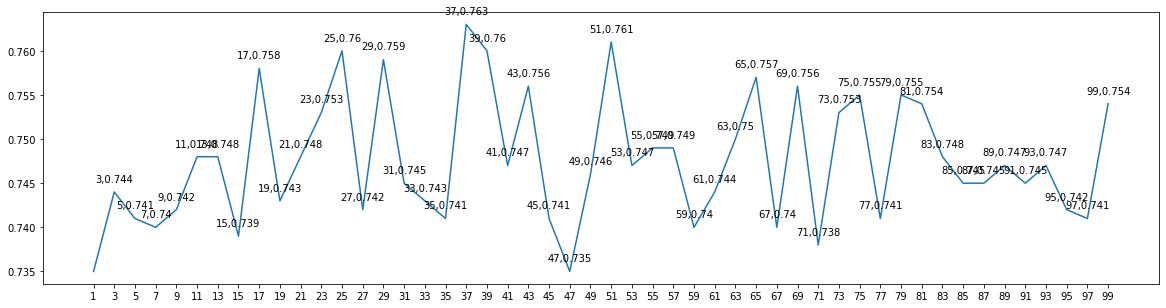

In [44]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
plt.xticks(values,values)

for i in np.arange(1,len(score)):
     plt.annotate(str(values[i])+","+str(score[i]),
                 (values[i],score[i]), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 

plt.plot(values,score)

## Decision Tree With Regularization

In [45]:
d_tree_r = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5)
d_tree_r.fit(X_train,y_train)
print("Training Score = "+str(d_tree_r.score(X_train,y_train)))
print("Training Score = "+str(d_tree_r.score(X_test,y_test)))

Training Score = 0.78
Training Score = 0.7366666666666667


## Ensemble Bagging with decision Tree Regularised

In [46]:
score = []
values =np.arange(1,100,2)
d_tree_r = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5)

for i in values:
    bag_Class = BaggingClassifier(base_estimator=d_tree_r,n_estimators=50,max_samples=0.8,oob_score=True)
    bag_Class.fit(X,y)
    score.append(bag_Class.oob_score_)

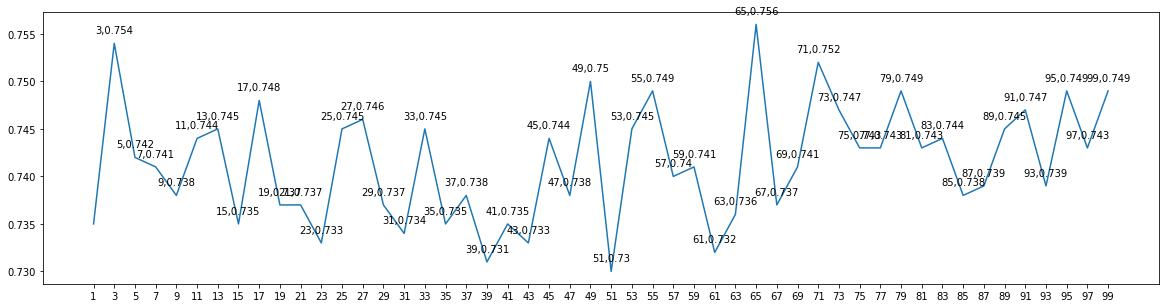

In [47]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
plt.xticks(values,values)

for i in np.arange(1,len(score)):
     plt.annotate(str(values[i])+","+str(score[i]),
                 (values[i],score[i]), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 

plt.plot(values,score)

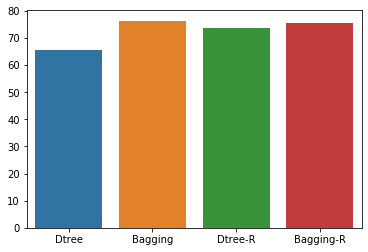

In [51]:
sns.barplot(['Dtree','Bagging','Dtree-R','Bagging-R'],[65.66,76.3,73.66,75.6])

## AdaBoosting

In [64]:
values = np.arange(30,100)
scores = []

for i in values:
    dtree = DecisionTreeClassifier(criterion='entropy')
    ada_cls = AdaBoostClassifier(base_estimator=dtree,n_estimators=i)
    ada_cls.fit(X_train,y_train)
    scores.append(ada_cls.score(X_test,y_test))


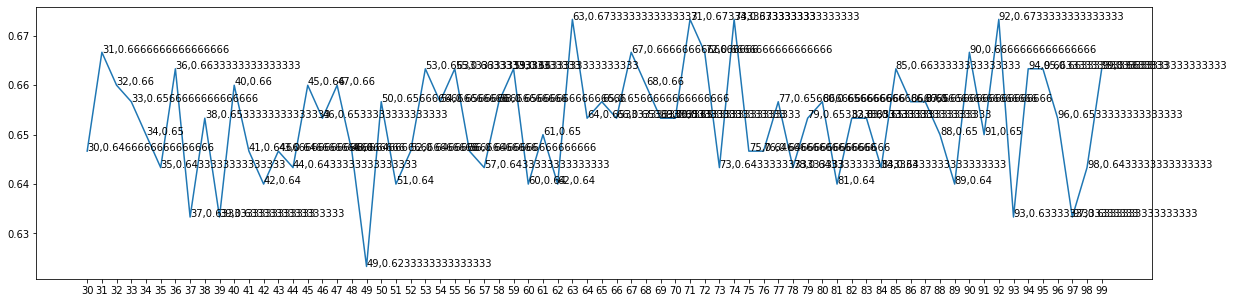

In [65]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)

plt.xticks(values)

for i in np.arange(0,len(values)):
    plt.annotate(str(values[i])+","+str(scores[i]),(values[i],scores[i]))

plt.plot(values,scores)

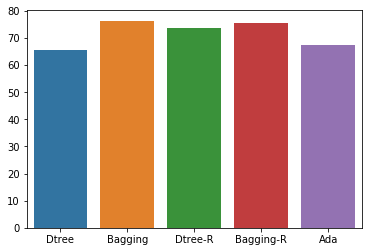

In [66]:
sns.barplot(['Dtree','Bagging','Dtree-R','Bagging-R','Ada'],[65.66,76.3,73.66,75.6,67.33])

## Gradiant Boosting

In [71]:
values = np.arange(30,100)
scores = []

for i in values:
    dtree = DecisionTreeClassifier(criterion='entropy')
    grd_cls = GradientBoostingClassifier(n_estimators=i)
    grd_cls.fit(X_train,y_train)
    scores.append(grd_cls.score(X_test,y_test))


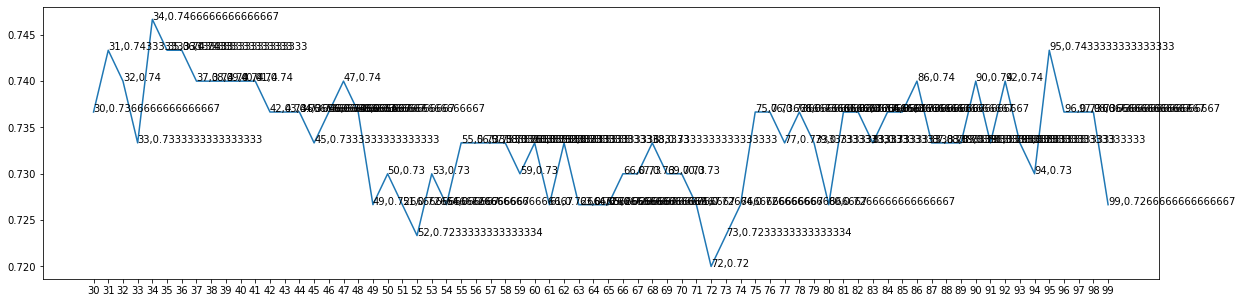

In [68]:
fix,ax = plt.subplots()

fix.set_size_inches(20,5)

plt.xticks(values)

for i in np.arange(0,len(values)):
    plt.annotate(str(values[i])+","+str(scores[i]),(values[i],scores[i]))

plt.plot(values,scores)

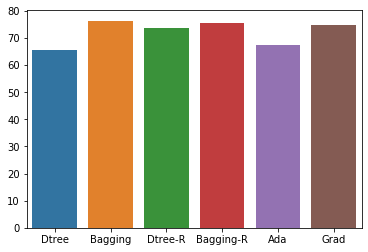

In [69]:
sns.barplot(['Dtree','Bagging','Dtree-R','Bagging-R','Ada','Grad'],[65.66,76.3,73.66,75.6,67.33,74.66])